# ***Tweets Sentiment Analysis Using LSTM or GRU***

# import the necessary libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from textblob import TextBlob
from wordcloud import WordCloud
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

pd.set_option('max_colwidth', None)

# Load The Data

In [5]:
df = pd.read_csv('C:/Users/user/Desktop/NLP LAB/NLP Project/hashtag_donaldtrump.csv', lineterminator='\n', usecols = ['tweet'])
df.head(10)

,tweet
0,#Elecciones2020 | En #Florida: #JoeBiden dice que #DonaldTrump solo se preocupa por él mismo. El demócrata fue anfitrión de encuentros de electores en #PembrokePines y #Miramar. Clic AQUÍ ⬇️⬇️⬇️\n⠀\n🌐https://t.co/qhIWpIUXsT\n_\n#ElSolLatino #yobrilloconelsol https://t.co/6FlCBWf1Mi
1,"Usa 2020, Trump contro Facebook e Twitter: coprono Biden #donaldtrump https://t.co/6ceURhe1VP https://t.co/94jidLjoON"
2,"#Trump: As a student I used to hear for years, for ten years, I heard China! In 2019! And we have 1.5 and they don't know how many we have and I asked them how many do we have and they said 'sir we don't know.' But we have millions. Like 300 million.\n\nUm. What?"
3,2 hours since last tweet from #Trump! Maybe he is VERY busy. Tremendously busy.
4,You get a tie! And you get a tie! #Trump ‘s rally #Iowa https://t.co/jJalUUmh5D
5,@CLady62 Her 15 minutes were over long time ago. Omarosa never represented the black community! #TheReidOut \n\nShe cried to #Trump begging for a job!
6,@richardmarx Glad u got out of the house! DICK!!#trump 2020💪🏽🇺🇸🇺🇸
7,@DeeviousDenise @realDonaldTrump @nypost There won’t be many of them. Unless you all have been voting more than once again. But God prevails. BO was the most corrupt President ever. Dark to light. Your lies are all coming through. They wouldn’t last forever. #Trump
8,One of the single most effective remedies to eradicate another round of #Trump Plague in our #WhiteHouse. https://t.co/QGB9ODIVS8
9,#Election2020 #Trump \n#FreedomOfSpeech https://t.co/9slOZFZNHJ


In [6]:
df.shape

(971156, 1)

In [7]:
df.isnull().sum()

tweet    84
dtype: int64

# Contractions to Expansion

In [8]:
contractions = {
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}


In [9]:
def cont_to_exp(x):
     if type(x) is str:
        x = x.replace('\\', '')
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
     else:
        return x

In [10]:
cont_to_exp("i don't have any money\.")

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
C:\Users\user\AppData\Local\Temp\ipykernel_16628\3475713725.py:1: SyntaxWarning: invalid escape sequence '\.'
  cont_to_exp("i don't have any money\.")


'i do not have any money.'

In [11]:
df['tweet'] = df['tweet'].apply(lambda x: cont_to_exp(x))
df.head()

,tweet
0,#Elecciones2020 | En #Florida: #JoeBiden dice que #DonaldTrump solo se preocupa por él mismo. El demócrata fue anfitrión de encuentros de electores en #PembrokePines y #Miramar. Clic AQUÍ ⬇️⬇️⬇️\n⠀\n🌐https://t.co/qhIWpIUXsT\n_\n#ElSolLatino #yobrilloconelsol https://t.co/6FlCBWf1Mi
1,"Usa 2020, Trump contro Facebook e Twitter: coprono Biden #donaldtrump https://t.co/6ceURhe1VP https://t.co/94jidLjoON"
2,"#Trump: As a student I used to hear for years, for ten years, I heard China! In 2019! And we have 1.5 and they do not know how many we have and I asked them how many do we have and they said 'sir we do not know.' But we have millions. Like 300 million.\n\nUm. What?"
3,2 hours since last tweet from #Trump! Maybe he is VERY busy. Tremendously busy.
4,You get a tie! And you get a tie! #Trump ‘s rally #Iowa https://t.co/jJalUUmh5D


# Clean Data

In [ ]:
def clean_tweets(text):
    text = re.sub(r'\brt\b', "", text) # remove retweets RT
    text = re.sub(r'[^\w ]+', "", text) # remove mentions4
    text = re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-])',"", text) # remove emails
    text = re.sub(r'([http|https|ftp|ssh])://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%/~+#-]*[\w@?^=%&/~+#-])?',"", text) # remove Urls
    text = re.sub(r'\n', "", text)
    return text

In [ ]:
try:
    # Assuming df is your DataFrame containing the 'tweet' column
    df['tweet'] = df['tweet'].astype(str)  # Convert all values to strings

    # Apply clean_tweets function to the 'tweet' column
    df['tweet'] = df['tweet'].apply(lambda x: clean_tweets(x))

    # Continue with your data processing and analysis

except Exception as e:
    print("An error occurred:", e)


In [ ]:
df.head(10)

,tweet
0,Elecciones2020 En Florida JoeBiden dice que DonaldTrump solo se preocupa por él mismo El demócrata fue anfitrión de encuentros de electores en PembrokePines y Miramar Clic AQUÍ httpstcoqhIWpIUXsT_ElSolLatino yobrilloconelsol httpstco6FlCBWf1Mi
1,Usa 2020 Trump contro Facebook e Twitter coprono Biden donaldtrump httpstco6ceURhe1VP httpstco94jidLjoON
2,Trump As a student I used to hear for years for ten years I heard China In 2019 And we have 15 and they do not know how many we have and I asked them how many do we have and they said sir we do not know But we have millions Like 300 millionUm What
3,2 hours since last tweet from Trump Maybe he is VERY busy Tremendously busy
4,You get a tie And you get a tie Trump s rally Iowa httpstcojJalUUmh5D
5,CLady62 Her 15 minutes were over long time ago Omarosa never represented the black community TheReidOut She cried to Trump begging for a job
6,richardmarx Glad u got out of the house DICKtrump 2020
7,DeeviousDenise realDonaldTrump nypost There wont be many of them Unless you all have been voting more than once again But God prevails BO was the most corrupt President ever Dark to light Your lies are all coming through They wouldnt last forever Trump
8,One of the single most effective remedies to eradicate another round of Trump Plague in our WhiteHouse httpstcoQGB9ODIVS8
9,Election2020 Trump FreedomOfSpeech httpstco9slOZFZNHJ


In [ ]:
' '.join(df['tweet'].tolist()[:10])

'Elecciones2020  En Florida JoeBiden dice que DonaldTrump solo se preocupa por él mismo El demócrata fue anfitrión de encuentros de electores en PembrokePines y Miramar Clic AQUÍ httpstcoqhIWpIUXsT_ElSolLatino yobrilloconelsol httpstco6FlCBWf1Mi Usa 2020 Trump contro Facebook e Twitter coprono Biden  donaldtrump httpstco6ceURhe1VP httpstco94jidLjoON Trump As a student I used to hear for years for ten years I heard China In 2019 And we have 15 and they do not know how many we have and I asked them how many do we have and they said sir we do not know But we have millions Like 300 millionUm What 2 hours since last tweet from Trump Maybe he is VERY busy Tremendously busy You get a tie And you get a tie Trump s rally Iowa httpstcojJalUUmh5D CLady62 Her 15 minutes were over long time ago Omarosa never represented the black community TheReidOut She cried to Trump begging for a job richardmarx Glad u got out of the house DICKtrump 2020 DeeviousDenise realDonaldTrump nypost There wont be many o

# Check Polarity

If Polarity < 0 ---> negative tweet, if Polarity==0 ---> Neutral tweet, if Polarity > 0 ---> Positive tweet,

In [ ]:
df['polarity'] = df['tweet'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [ ]:
df['tweet_len'] = df['tweet'].apply(lambda x: len(x))

In [ ]:
df['word_count'] = df['tweet'].apply(lambda x: len(x.split()))

In [ ]:
def avg_word_len(x):
    words = x.split()
    word_len = 0
    for word in words:
        word_len += len(word)

    return word_len / len(words)

In [ ]:
df['avg_word_len'] = df['tweet'].apply(lambda x: avg_word_len(x))

In [ ]:
df.head()

,tweet,polarity,tweet_len,word_count,avg_word_len
0,Elecciones2020 En Florida JoeBiden dice que DonaldTrump solo se preocupa por él mismo El demócrata fue anfitrión de encuentros de electores en PembrokePines y Miramar Clic AQUÍ httpstcoqhIWpIUXsT_ElSolLatino yobrilloconelsol httpstco6FlCBWf1Mi,0.000000,244,30,7.133333
1,Usa 2020 Trump contro Facebook e Twitter coprono Biden donaldtrump httpstco6ceURhe1VP httpstco94jidLjoON,0.000000,105,12,7.750000
2,Trump As a student I used to hear for years for ten years I heard China In 2019 And we have 15 and they do not know how many we have and I asked them how many do we have and they said sir we do not know But we have millions Like 300 millionUm What,0.333333,247,56,3.428571
3,2 hours since last tweet from Trump Maybe he is VERY busy Tremendously busy,0.076667,75,14,4.428571
4,You get a tie And you get a tie Trump s rally Iowa httpstcojJalUUmh5D,0.000000,69,14,4.000000


# Distribution of Sentiment Polarity

In [ ]:
from plotly.offline import iplot
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False)

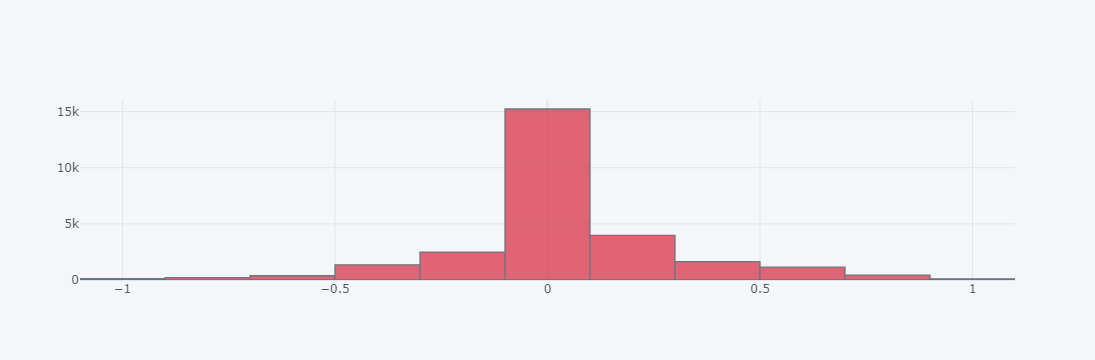

In [26]:
df['polarity'].iplot(kind='hist', color = 'red', bins = 20)

Most of the tweets are neutral, this is also because of another language tweets, there are tweets which from another language so thats why many of the tweets give 0 polarity

# Word Count Distribution

In [27]:
df['word_count'].iplot(kind = 'hist', xTitle = 'words', yTitle = 'Count', title = 'Sentiment Polarity Distribution')

As you can see the most of tweet have 10 to 20 words

# Avg Length of Words Distribution

In [28]:
df['avg_word_len'].iplot(kind='hist', bins = 50, xTitle = 'Avg_word_len', yTitle = 'count', title = 'Avg_Word_len Distribution')

# Tweet Length Distribution

In [29]:
df['tweet_len'].iplot(kind='hist', bins= 100, color = 'orange', linecolor='gray', xTitle='Tweet Length', yTitle='Count', title = 'Tweet Length Distribution')

# Plot Word Cloud

In [32]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

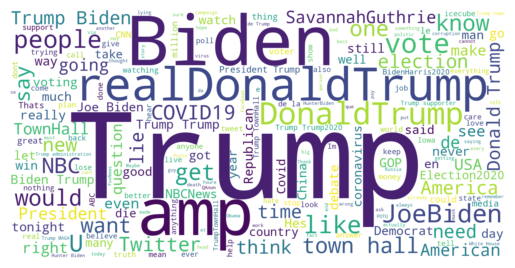

In [33]:
allwords = ' '.join([twt for twt in df['tweet']])
wordcloud = WordCloud(width = 1600, height=800, random_state=42, background_color = 'white', stopwords = stopwords.words('english'), min_font_size = 10).generate(allwords)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Now Create a Model For Sentiment Analysi

In [34]:
def polarity_to_sentiment(x):
#     if type(x) is float:
#         for i in range(0, len(x)):
    if x > 0:
        return 1 # 1 = Positive
    if x < 0:
        return 0 # 0 = negative
    else:
        return 2 # 2 = Neutral

In [35]:
df['sentiments'] = df['polarity'].apply(lambda x: polarity_to_sentiment(x))

In [36]:
df.head()

,tweet,polarity,tweet_len,word_count,avg_word_len,sentiments
0,Elecciones2020 En Florida JoeBiden dice que DonaldTrump solo se preocupa por él mismo El demócrata fue anfitrión de encuentros de electores en PembrokePines y Miramar Clic AQUÍ httpstcoqhIWpIUXsT_ElSolLatino yobrilloconelsol httpstco6FlCBWf1Mi,0.000000,244,30,7.133333,2
1,Usa 2020 Trump contro Facebook e Twitter coprono Biden donaldtrump httpstco6ceURhe1VP httpstco94jidLjoON,0.000000,105,12,7.750000,2
2,Trump As a student I used to hear for years for ten years I heard China In 2019 And we have 15 and they do not know how many we have and I asked them how many do we have and they said sir we do not know But we have millions Like 300 millionUm What,0.333333,247,56,3.428571,1
3,2 hours since last tweet from Trump Maybe he is VERY busy Tremendously busy,0.076667,75,14,4.428571,1
4,You get a tie And you get a tie Trump s rally Iowa httpstcojJalUUmh5D,0.000000,69,14,4.000000,2


# Distribution of Sentiments

<Axes: >

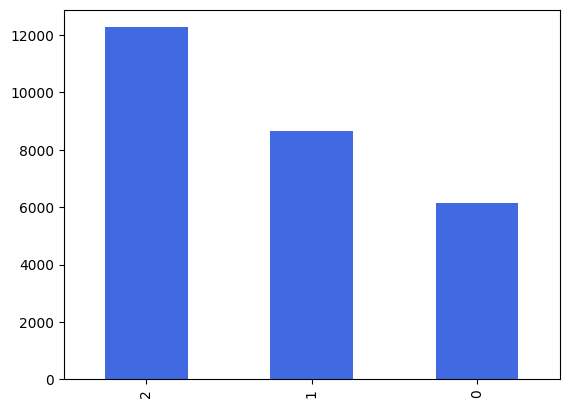

In [37]:
df['sentiments'].value_counts().plot.bar(color='royalblue')

# Split the Data to Dependent and Indepedent

In [39]:
# dependent Features
y = df['sentiments']

# Independent Features
X = df.drop('sentiments', axis=1)

# PorterStemmer

In [40]:
messages = X.copy()

In [41]:
from nltk import PorterStemmer
nltk.download('stopwords')
nltk.download('words')
words = set(nltk.corpus.words.words())
stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [42]:
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['tweet'][i])
    review = review.lower()
    review = review.split()
    review = [w for w in nltk.wordpunct_tokenize(str(review)) if w.lower() in words or not w.isalpha()]

    review = [ps.stem(word) for word in review if not word in stopwords]
    review = ' '.join(review)
    corpus.append(review)

In [43]:
corpus[0]

"[' ', ' en ', ' ', ' ', ' dice ', ' ', ' ', ' solo ', ' se ', ' ', ' ', ' l ', ' ', ' el ', ' ', ' ', ' ', ' ', ' n ', ' de ', ' ', ' de ', ' ', ' en ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' mi ']"

# Tokenize the Data

In [44]:
from tensorflow.keras.preprocessing.text import Tokenizer


In [45]:
voc_size = 50000
max_len = 120
embedding_features = 32

In [46]:
tokenizer = Tokenizer(num_words=voc_size, oov_token = '<OOV>')
tokenizer.fit_on_texts(corpus)

Here, the value of oov_token is set to be ‘OOV’. That means any unknown words will be replaced by oov_token

# Embedding

In [47]:
sequences = tokenizer.texts_to_sequences(corpus)

In [48]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
embedded_doc = pad_sequences(sequences, maxlen=max_len, padding= 'post', truncating = 'post')
embedded_doc[0]

array([   2,    2,    2,   25,    2,    2,    2,    2,    2,    2, 1018,
          2,    2,    2,    2,    2,    2,  791,    2,    2,  100,    2,
          2,    2,    2,    2,    2,   84,    2,    2,    2,    2,   60,
          2,    2,    2,    2,    2,    2,    2,    2,    2,    2,   23,
          2,    2,    7,    2,    2,    2,    2,    7,    2,    2,    2,
          2,   25,    2,    2,    2,    2,    2,    2,    2,    2,    2,
          2,    2,    2,    2,    2,    2,    2,    2,    2,    2,    2,
          2,    2,  991,    2,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
      dtype=int32)

In [49]:
X_final = np.array(embedded_doc)
y_final = np.array(y)

In [50]:
X_final.shape, y_final.shape

((27075, 120), (27075,))

# Model Creation

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, GRU

In [52]:
model = Sequential()
model.add(Embedding(voc_size, embedding_features, input_length = max_len))
# model.add(Dropout(0.3))
model.add(GRU(100))
model.add(Dense(62, activation = 'relu'))
# model.add(Dropout(0.3))
model.add(Dense(32, activation = 'relu'))
# model.add(Dropout(0.3))
model.add(Dense(3, activation = 'softmax'))
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 32)           1600000   
                                                                 
 gru (GRU)                   (None, 100)               40200     
                                                                 
 dense (Dense)               (None, 62)                6262      
                                                                 
 dense_1 (Dense)             (None, 32)                2016      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 1648577 (6.29 MB)
Trainable params: 1648577 (6.29 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


# Split the Data into Train and Test

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size = 0.25, stratify = y, random_state=42)

# Train The Mode

In [54]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 10, batch_size=32)

Epoch 1/10
635/635 [==============================] - 94s 141ms/step - loss: 0.9939 - accuracy: 0.5160 - val_loss: 0.9056 - val_accuracy: 0.5685
Epoch 2/10
635/635 [==============================] - 84s 133ms/step - loss: 0.6278 - accuracy: 0.7403 - val_loss: 0.5443 - val_accuracy: 0.7979
Epoch 3/10
635/635 [==============================] - 88s 138ms/step - loss: 0.4757 - accuracy: 0.8263 - val_loss: 0.5013 - val_accuracy: 0.8205
Epoch 4/10
635/635 [==============================] - 84s 133ms/step - loss: 0.4271 - accuracy: 0.8496 - val_loss: 0.4935 - val_accuracy: 0.8257
Epoch 5/10
635/635 [==============================] - 85s 134ms/step - loss: 0.3868 - accuracy: 0.8657 - val_loss: 0.5156 - val_accuracy: 0.8301
Epoch 6/10
635/635 [==============================] - 84s 133ms/step - loss: 0.3475 - accuracy: 0.8834 - val_loss: 0.5181 - val_accuracy: 0.8159
Epoch 7/10
635/635 [==============================] - 84s 133ms/step - loss: 0.3176 - accuracy: 0.8978 - val_loss: 0.5638 - val_ac

# Performance Metrics and Accuracy

In [55]:
y_pred = ((model.predict(X_test)>0.5).astype('int32'))

212/212 [==============================] - 8s 33ms/step


# Confusion Matrix

In [56]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, np.argmax(y_pred, axis = 1))

array([[1205,  197,  133],
       [ 349, 1615,  203],
       [ 149,  176, 2742]])

# Accuracy

In [57]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, np.argmax(y_pred, axis=1))

0.8216871029694194